In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#1
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.embark_town = df.embark_town.str.lower()
df.embark_town.head(3)

0    southampton
1      cherbourg
2    southampton
Name: embark_town, dtype: object

In [4]:
df.sex = df.sex.str.upper()
df.sex.head(3)

0      MALE
1    FEMALE
2    FEMALE
Name: sex, dtype: object

In [5]:
df.sex.head(3).str.isupper()

0    True
1    True
2    True
Name: sex, dtype: bool

In [19]:
df.pclass.astype("string").str.isdigit().head(3)

0    True
1    True
2    True
Name: pclass, dtype: boolean

In [20]:
df.pclass.astype("string").str.isnumeric().head(3)

0    True
1    True
2    True
Name: pclass, dtype: boolean

In [21]:
df.age.isnull().sum()

177

In [22]:
df.age = df.age.replace(np.nan, "UNKNOWN")

In [25]:
df[df.age == "UNKNOWN"].age.count()

177

In [27]:
df[df.sibsp.astype("string").str.contains("1")].head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,MALE,22.0,1,0,7.2500,S,Third,man,True,NaN,southampton,no,False
1,1,1,FEMALE,38.0,1,0,71.2833,C,First,woman,False,C,cherbourg,yes,False
3,1,1,FEMALE,35.0,1,0,53.1000,S,First,woman,False,C,southampton,yes,False


In [30]:
df.sex.str.split("LE").head(3)

0      [MA, ]
1    [FEMA, ]
2    [FEMA, ]
Name: sex, dtype: object

In [31]:
df.sex.str.strip("LE").head(3)

0      MA
1    FEMA
2    FEMA
Name: sex, dtype: object

In [38]:
df.embark_town.str.find("southampton").head(3)

0    0.0
1   -1.0
2    0.0
Name: embark_town, dtype: float64

In [43]:
df.embark_town.str.find("h").head(3)

0    4.0
1    1.0
2    4.0
Name: embark_town, dtype: float64

In [44]:
df.embark_town.str.find("hamp").head(3)

0    4.0
1   -1.0
2    4.0
Name: embark_town, dtype: float64

In [45]:
df.embark_town.str.find("pt").head(3)

0    7.0
1   -1.0
2    7.0
Name: embark_town, dtype: float64

In [35]:
df.embark_town.str.findall("southampton").head(3)

0    [southamp]
1            []
2    [southamp]
Name: embark_town, dtype: object

In [48]:
df.embark_town.str.findall("southamp").head(3)

0    [southamp]
1            []
2    [southamp]
Name: embark_town, dtype: object

In [49]:
#2
"hello".upper()

'HELLO'

In [50]:
orders = pd.read_table("http://bit.ly/chiporders")

In [51]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [53]:
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [56]:
orders.item_name.str.contains("Chicken")

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [57]:
orders.item_name.str.contains("Chicken").sum()

1560

In [58]:
orders[orders.item_name.str.contains("Chicken")]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [64]:
orders.choice_description.str.replace('[', '')

0                                                     NaN
1                                             Clementine]
2                                                  Apple]
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620     Fresh Tomato Salsa, Fajita Vegetables, Lettuce]]
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

In [66]:
orders.choice_description.str.replace('[', '').str.replace("]", '')

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

In [67]:
orders.choice_description.str.replace('[\[\]]', '')

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

In [69]:
#3
df = sns.load_dataset("flights")
df.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [70]:
df.year = pd.to_datetime(df.year, format = "%Y")
df.year.head(3)

0   1949-01-01
1   1949-01-01
2   1949-01-01
Name: year, dtype: datetime64[ns]

In [71]:
from datetime import datetime
current_date = datetime.now()
current_date

datetime.datetime(2022, 8, 17, 15, 5, 53, 158143)

In [72]:
date = current_date.strftime(('%d'+' '+'%b'+' '+'%Y'))
date

'17 Aug 2022'

In [73]:
datetime.strptime(date, '%d %b %Y')

datetime.datetime(2022, 8, 17, 0, 0)

In [74]:
from datetime import timedelta
two_days_before = current_date.now() - timedelta(days = 2)
two_days_before

datetime.datetime(2022, 8, 15, 15, 9, 46, 628719)

In [79]:
#4
current_date = datetime.now()
current_date

datetime.datetime(2022, 8, 17, 15, 12, 25, 64619)

In [76]:
current_date.date()

datetime.date(2022, 8, 17)

In [81]:
current_date.day

17

In [82]:
current_date.month

8

In [83]:
current_date.year

2022

In [77]:
from datetime import date
date.today()

datetime.date(2022, 8, 17)

### strftime

In [84]:
current_date.strftime("%d")

'17'

In [85]:
current_date.strftime("%B")

'August'

In [86]:
current_date.strftime("%W")

'33'

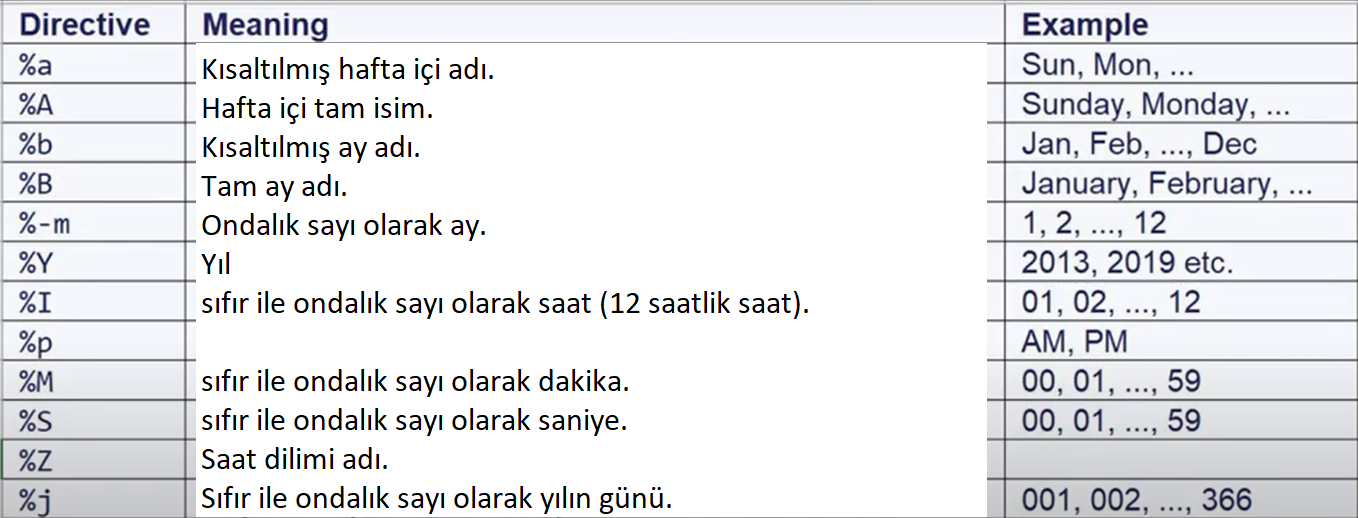

### strptime

In [89]:
str1 = "2022-12-31"
date1 = datetime.strptime(str1, "%Y-%m-%d")
date1

datetime.datetime(2022, 12, 31, 0, 0)

In [90]:
date1.year

2022

### timedelta

In [93]:
current_date = datetime.now()
date_after_10_day = current_date + timedelta(days = 10)
date_after_10_day

datetime.datetime(2022, 8, 27, 15, 29, 33, 567196)

In [94]:
#5
df = pd.DataFrame([("Foreign Cinema", 289.0),
                   ("Liho Liho", 244.0),
                   ("500 Club", 80.5),
                   ("Foreign Cinema", 25.3)],
                 columns = ("name", "Amount"))
df

,name,Amount
0,Foreign Cinema,289.0
1,Liho Liho,244.0
2,500 Club,80.5
3,Foreign Cinema,25.3


### 1. Creating Dummy Indicator Columns

In [95]:
pd.get_dummies(df, columns=['name'])

,Amount,name_500 Club,name_Foreign Cinema,name_Liho Liho
0,289.0,0,1,0
1,244.0,0,0,1
2,80.5,1,0,0
3,25.3,0,1,0


### 2. Creating Dumy Indicator columns with prefix

In [96]:
pd.get_dummies(df, columns=['name'], prefix = "dmy")

,Amount,dmy_500 Club,dmy_Foreign Cinema,dmy_Liho Liho
0,289.0,0,1,0
1,244.0,0,0,1
2,80.5,1,0,0
3,25.3,0,1,0


In [97]:
pd.get_dummies(df, columns=['name'], prefix = "dmy", prefix_sep = '*')

,Amount,dmy*500 Club,dmy*Foreign Cinema,dmy*Liho Liho
0,289.0,0,1,0
1,244.0,0,0,1
2,80.5,1,0,0
3,25.3,0,1,0


### 3.Creating Dummy Indicator columns dropping the first variable

In [98]:
pd.get_dummies(df, columns=['name'], drop_first=True)

,Amount,name_Foreign Cinema,name_Liho Liho
0,289.0,1,0
1,244.0,0,1
2,80.5,0,0
3,25.3,1,0
